In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et
import pickle
%matplotlib inline

In [2]:
data0=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO.pkl','rb'))
data=data0.loc[(data0.Year==2017)&(data0.i>120)&(data0.j>200)&(data0.j<800)&(data0.Z<5)]

(200, 800)

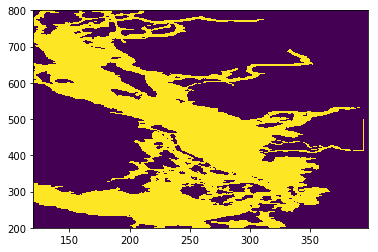

In [3]:
mesh=nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask=mesh.variables['tmask']
plt.pcolormesh(tmask[0,0,:,:])
plt.xlim(120,398)
plt.ylim(200,800)

In [4]:
len(data)

308

In [5]:
data2=data.loc[:,['dtUTC','i','j','Z']].drop_duplicates()

In [6]:
len(data2)

275

In [7]:
tstart=dt.datetime(2017,1,1)
tend=dt.datetime(2017,12,31)

In [ ]:
# make links 
# SalishSea_1h_xxxx_grid_U.nc
# SalishSea_1h_xxxx_grid_V.nc
# SalishSea_1h_xxxx_grid_W.nc
# SalishSea_1h_xxxx_grid_T.nc
linkdir='/data/eolson/results/MEOPAR/ariane-2.2.8_04-new/experiment/Links/'
flen=1
namfmt='nowcast'
fU=et.index_model_files(tstart,tend,'/data/eolson/results/MEOPAR/SS36runs/linkHC201812/','nowcast',1,'grid_U',1)
fV=et.index_model_files(tstart,tend,'/data/eolson/results/MEOPAR/SS36runs/linkHC201812/','nowcast',1,'grid_V',1)
fW=et.index_model_files(tstart,tend,'/data/eolson/results/MEOPAR/SS36runs/linkHC201812/','nowcast',1,'grid_W',1)
fT=et.index_model_files(tstart,tend,'/data/eolson/results/MEOPAR/SS36runs/linkHC201812/','nowcast',1,'grid_T',1)
tind=0
for ii in range(0,len(fU)):
    tind=tind+1
    src=fU.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_U.nc'
    os.symlink(src,linkdir+dst)
    src=fV.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_V.nc'
    os.symlink(src,linkdir+dst)
    src=fW.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_W.nc'
    os.symlink(src,linkdir+dst)
    src=fT.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_T.nc'
    os.symlink(src,linkdir+dst)

In [8]:
# make links nowcast-green.201806
# SalishSea_1h_xxxx_grid_U.nc
# SalishSea_1h_xxxx_grid_V.nc
# SalishSea_1h_xxxx_grid_W.nc
# SalishSea_1h_xxxx_grid_T.nc
linkdir='/data/eolson/results/MEOPAR/ariane-2.2.8_04-new/experiment2OldHC/Links/'
flen=1
namfmt='nowcast'
fU=et.index_model_files(tstart,tend,'/results2/SalishSea/nowcast-green.201806/','nowcast',1,'grid_U',1)
fV=et.index_model_files(tstart,tend,'/results2/SalishSea/nowcast-green.201806/','nowcast',1,'grid_V',1)
fW=et.index_model_files(tstart,tend,'/results2/SalishSea/nowcast-green.201806/','nowcast',1,'grid_W',1)
fT=et.index_model_files(tstart,tend,'/results2/SalishSea/nowcast-green.201806/','nowcast',1,'grid_T',1)
tind=0
for ii in range(0,len(fU)):
    tind=tind+1
    src=fU.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_U.nc'
    os.symlink(src,linkdir+dst)
    src=fV.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_V.nc'
    os.symlink(src,linkdir+dst)
    src=fW.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_W.nc'
    os.symlink(src,linkdir+dst)
    src=fT.loc[ii,['paths']].values[0]
    dst='SalishSea_1h_'+'{0:03d}'.format(tind)+'_grid_T.nc'
    os.symlink(src,linkdir+dst)

In [9]:
# make initial_positions.txt
# for time, integer value is center of that file
# use half-integer values for each spatial position to get the center of a T grid cell
# Upos=i-.5; Vpos=j-.5,  wpos=k+.5
# Upos, Vpos, Wpos, time, 1.0
f=open('/data/eolson/results/MEOPAR/ariane-2.2.8_04-new/experiment/initial_positions.txt','w')
# open example file to get depths:
fZ=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15mar17/SalishSea_1d_20170315_20170315_grid_T.nc')
for xx,irow in data2.iterrows():
    i=irow['i']+.5
    j=irow['j']+.5
    k=et._getZInd_bin(irow['Z'],fZ)+1.5
    ti=dt.datetime(1970,1,1)+dt.timedelta(seconds=(irow['dtUTC']-np.datetime64('1970-01-01T00:00:00'))/np.timedelta64(1,'s'))
    l=(ti-tstart).total_seconds()/(3600)+.5
    if (tmask[0,int(k-1.5),int(j+.5),int(i+.5)]==1) and (tmask[0,int(k-1.5),int(j+.5),int(i+1.5)]==1):
        line1=("{} {} {} {} 1.0\n".format(i,j,k,l))
        line2=("{} {} {} {} 1.0\n".format(i+1,j,k,l))
        print(irow['i'],irow['j'],line1)
        print(irow['i'],irow['j'],line2)
        f.write(line1)
        f.write(line2)
    elif (tmask[0,int(k-1.5),int(j+.5),int(i+.5)]==1) and (tmask[0,int(k-1.5),int(j+.5),int(i-.5)]==1):
        line1=("{} {} {} {} 1.0\n".format(i,j,k,l))
        line2=("{} {} {} {} 1.0\n".format(i-1,j,k,l))
        print(irow['i'],irow['j'],line1)
        print(irow['i'],irow['j'],line2)
        f.write(line1)
        f.write(line2)
f.close()
fZ.close()

240 328 240.5 328.5 1.5 1193.2458333333334 1.0

240 328 241.5 328.5 1.5 1193.2458333333334 1.0

291 343 291.5 343.5 1.5 1196.4802777777777 1.0

291 343 292.5 343.5 1.5 1196.4802777777777 1.0

280 370 280.5 370.5 2.5 1198.4016666666666 1.0

280 370 281.5 370.5 2.5 1198.4016666666666 1.0

263 422 263.5 422.5 2.5 1201.1391666666666 1.0

263 422 264.5 422.5 2.5 1201.1391666666666 1.0

263 456 263.5 456.5 3.5 1202.7705555555556 1.0

263 456 264.5 456.5 3.5 1202.7705555555556 1.0

245 487 245.5 487.5 2.5 1204.5633333333333 1.0

245 487 246.5 487.5 2.5 1204.5633333333333 1.0

245 487 245.5 487.5 5.5 1204.5633333333333 1.0

245 487 246.5 487.5 5.5 1204.5633333333333 1.0

246 504 246.5 504.5 2.5 1206.7683333333334 1.0

246 504 247.5 504.5 2.5 1206.7683333333334 1.0

205 546 205.5 546.5 2.5 1208.9966666666667 1.0

205 546 206.5 546.5 2.5 1208.9966666666667 1.0

205 546 205.5 546.5 5.5 1208.9966666666667 1.0

205 546 206.5 546.5 5.5 1208.9966666666667 1.0

162 583 162.5 583.5 1.5 1211.49916666666

In [12]:
# make initial_positions.txt
# for time, integer value is center of that file
# use half-integer values for each spatial position to get the center of a T grid cell
# Upos=i-.5; Vpos=j-.5,  wpos=k+.5
# Upos, Vpos, Wpos, time, 1.0
f=open('/data/eolson/results/MEOPAR/ariane-2.2.8_04-new/experiment2/initial_positions.txt','w')
for ii in np.arange(120,355,3):
    for jj in np.arange(200,800,3):
        i=ii+.5
        j=jj+.5
        k=1.5
        ti=dt.datetime(2017,4,10)
        l=(ti-tstart).total_seconds()/(3600)+.5
        if (tmask[0,0,jj,ii]==1) and (tmask[0,0,jj,ii+1]==1):
            line1=("{} {} {} {} 1.0\n".format(i,j,k,l))
            line2=("{} {} {} {} 1.0\n".format(i+1,j,k,l))
            f.write(line1)
            f.write(line2)
f.close()

In [10]:
np.arange(120,355,3)

array([120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156,
       159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195,
       198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234,
       237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273,
       276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312,
       315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351,
       354])